# Capstone Project Codes

* Data used: *"China HRC Price Model - Edited Combined Data.csv"*

### Import Packages

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [98]:
## use this part, if you are using google colab
#from google.colab import drive
#drive.mount('/content/drive')

### Data Loading

In [99]:
# Load the data and check the first few lines
dataset_path = "China HRC Price Model - Edited Combined Data.csv"
df = pd.read_csv(dataset_path)
df.head()

,Month,"HRC \n(FOB, $/t)","Iron Ore \n(CFR, $/t)","HCC \n(Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost \n($/t),HRC - RM \nSpread ($/t),CS Production (Mnt),Exports \n(Mnt),Imports \n(Mnt),Net Exports (Mnt),Export as % of Production,Cummulative FAI growth (%),Domestic Scrap (DDP Jiangsu incl. VAT $/t).1,ACSU \n(Mnt),Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),Monthly Iron ore Imports (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Stocks of iron ore at China's seaport (Mt.),YTD Growth rate of Investment (Fixed asset investment),Fixed asset investment in real estate development in urban areas (y-o-y )Growth,Floor space under construction (y-o-y),Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,Jan-06,388,47,125,248,200,187,30.0,2.0,2.0,0.0,7%,26.6%,248,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-06,388,48,125,248,202,185,30.0,2.0,1.0,1.0,7%,26.6%,248,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-06,449,50,125,251,205,244,33.0,3.0,2.0,1.0,9%,29.8%,251,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-06,478,57,116,257,207,271,35.0,3.0,2.0,1.0,9%,29.6%,257,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May-06,505,56,116,263,205,300,36.0,4.0,2.0,3.0,12%,30.3%,263,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df.columns

Index(['Month', 'HRC \n(FOB, $/t)', 'Iron Ore \n(CFR, $/t)',
       'HCC \n(Aus FOB, $/t)', 'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
       'RM Cost \n($/t)', 'HRC - RM \nSpread ($/t)', 'CS Production (Mnt)',
       'Exports \n(Mnt)', 'Imports \n(Mnt)', 'Net Exports (Mnt)',
       'Export as % of Production', 'Cummulative FAI growth (%)',
       'Domestic Scrap (DDP Jiangsu incl. VAT $/t).1', 'ACSU \n(Mnt)',
       'Monthly Imports of semis & finished steel (Mt.)',
       'Monthly Export of semis & finished steel (Mt.)',
       'Monthly Iron ore Imports (Mt.)', 'YTD Iron ore Imports (Mt.)',
       'YTD Iron ore Production (Mt.)', 'Monthly Iron ore Production (Mt.)',
       'Stocks of iron ore at China's seaport (Mt.)',
       'YTD Growth rate of  Investment  (Fixed asset investment)',
       'Fixed asset investment in real estate development in urban areas (y-o-y )Growth',
       'Floor space under construction (y-o-y)',
       'Automobile Production (y-o-y)',
       'Civil Metal-

### Data Check
* Missing data in columns.
* Duplicates.
* Data types.

In [101]:
dataset.isnull().sum()

Month                                                                               0
HRC \n(FOB, $/t)                                                                    0
Iron Ore \n(CFR, $/t)                                                               0
HCC \n(Aus FOB, $/t)                                                                0
Domestic Scrap (DDP Jiangsu incl. VAT $/t)                                          0
RM Cost \n($/t)                                                                     0
HRC - RM \nSpread ($/t)                                                             0
CS Production (Mnt)                                                                 1
Exports \n(Mnt)                                                                     1
Imports \n(Mnt)                                                                     1
Net Exports (Mnt)                                                                   1
Export as % of Production                             

In [102]:
df.duplicated().sum()

np.int64(0)

In [103]:
type(df['Export as % of Production'][0])

str

In [104]:
# Delete % sign from column values
col_w_perc = ['Export as % of Production', 'Cummulative FAI growth (%)',
              'YTD Growth rate of  Investment  (Fixed asset investment)',
              'Fixed asset investment in real estate development in urban areas (y-o-y )Growth',
              'Floor space under construction (y-o-y)', 'Automobile Production (y-o-y)',
              'Civil Metal-Vessels/Steel Ships (y-o-y)', 'Household Fridges (y-o-y)',
              'Air Conditioner (y-o-y)', 'Manufacturing PMI for steel']

for col in col_w_perc:
    df[col] = df[col].apply(lambda x: str(x).rstrip('%') if isinstance(x, str) else x)
    df[col] = pd.to_numeric(df[col])

df.head()

,Month,"HRC \n(FOB, $/t)","Iron Ore \n(CFR, $/t)","HCC \n(Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost \n($/t),HRC - RM \nSpread ($/t),CS Production (Mnt),Exports \n(Mnt),Imports \n(Mnt),Net Exports (Mnt),Export as % of Production,Cummulative FAI growth (%),Domestic Scrap (DDP Jiangsu incl. VAT $/t).1,ACSU \n(Mnt),Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),Monthly Iron ore Imports (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Stocks of iron ore at China's seaport (Mt.),YTD Growth rate of Investment (Fixed asset investment),Fixed asset investment in real estate development in urban areas (y-o-y )Growth,Floor space under construction (y-o-y),Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,Jan-06,388,47,125,248,200,187,30.0,2.0,2.0,0.0,7.0,26.6,248,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-06,388,48,125,248,202,185,30.0,2.0,1.0,1.0,7.0,26.6,248,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-06,449,50,125,251,205,244,33.0,3.0,2.0,1.0,9.0,29.8,251,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-06,478,57,116,257,207,271,35.0,3.0,2.0,1.0,9.0,29.6,257,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May-06,505,56,116,263,205,300,36.0,4.0,2.0,3.0,12.0,30.3,263,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df.to_csv('after_perc.csv', index=False)

<Axes: >

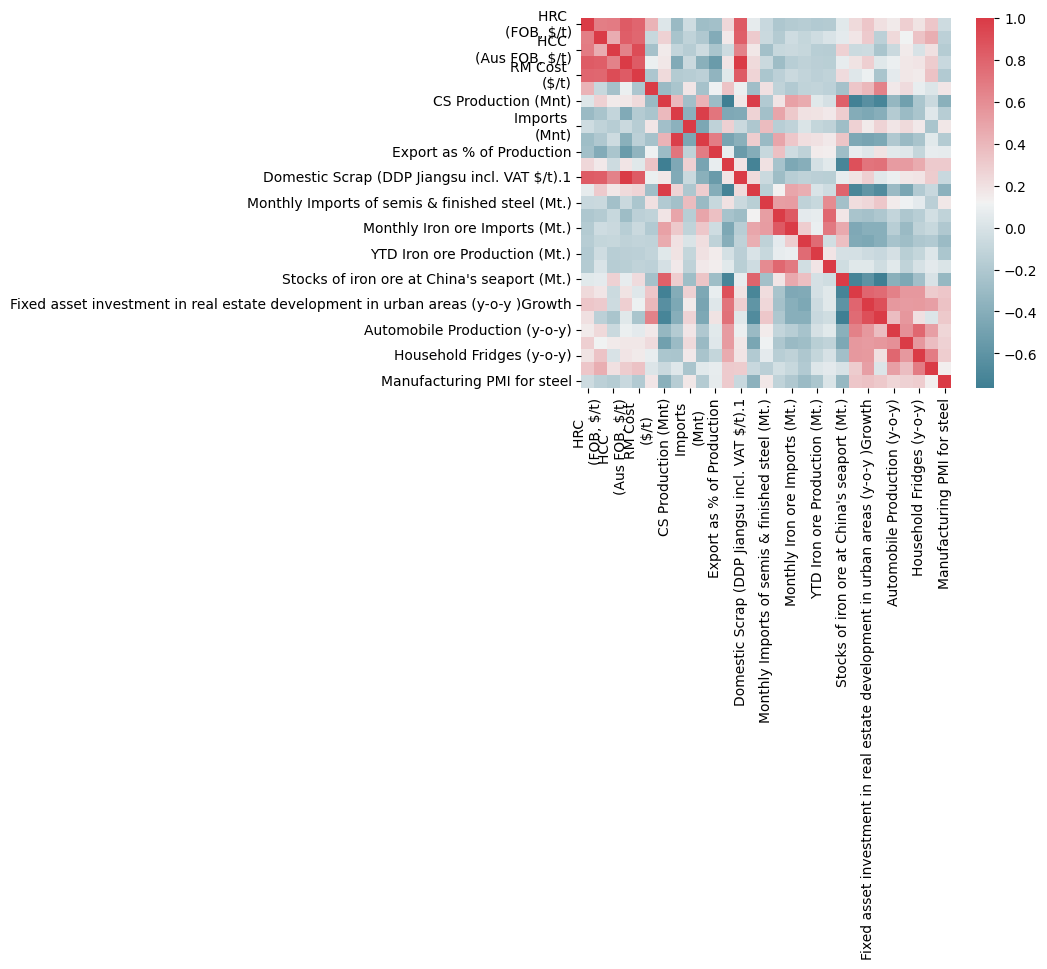

In [106]:
corrdata = df.loc[:, df.columns != 'Month']
corr = corrdata.corr()
sns.heatmap(corr, mask=np.zeros_like(corr), annot=False, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, fmt='.2f' ,  )

In [107]:
threshold = 0.8
high_corr_pairs = (
    corr.abs().where(np.triu(np.ones(corr.abs().shape), k=1).astype(bool))  # Keep only upper triangle
    .stack()  # Convert to Series
    .reset_index()
)

# Rename columns for clarity
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Filter pairs with correlation ≥ threshold
high_corr_pairs = pd.DataFrame(high_corr_pairs[high_corr_pairs['Correlation'] >= threshold])

# Compare the numbers of missing values in the correlated columns
missing_counts = df.isnull().sum()
high_corr_pairs['Missing Values (Var 1)'] = high_corr_pairs['Variable 1'].map(missing_counts)
high_corr_pairs['Missing Values (Var 2)'] = high_corr_pairs['Variable 2'].map(missing_counts)

# Display
high_corr_pairs.to_csv('highly_corr_vars.csv', index=False)
high_corr_pairs

,Variable 1,Variable 2,Correlation,Missing Values (Var 1),Missing Values (Var 2)
2,"HRC \n(FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),0.840440,0,0
11,"HRC \n(FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t).1,0.840440,0,0
29,"Iron Ore \n(CFR, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),0.826307,0,0
38,"Iron Ore \n(CFR, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t).1,0.826307,0,0
56,"HCC \n(Aus FOB, $/t)",RM Cost \n($/t),0.912347,0,0
81,Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost \n($/t),0.839700,0,0
89,Domestic Scrap (DDP Jiangsu incl. VAT $/t),Domestic Scrap (DDP Jiangsu incl. VAT $/t).1,1.000000,0,0
113,RM Cost \n($/t),Domestic Scrap (DDP Jiangsu incl. VAT $/t).1,0.839700,0,0
159,CS Production (Mnt),ACSU \n(Mnt),0.983331,1,3
166,CS Production (Mnt),Stocks of iron ore at China's seaport (Mt.),0.819031,1,15


In [108]:
columns_of_interest = ['Domestic Scrap (DDP Jiangsu incl. VAT $/t)', 'RM Cost \n($/t)',
                       'Exports \n(Mnt)', 'Net Exports (Mnt)']  # Replace with your column names

# Calculate max, min, and mean for the selected columns
stats = df[columns_of_interest].agg(['max', 'min', 'mean', 'median'])

stats

,Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost \n($/t),Exports \n(Mnt),Net Exports (Mnt)
max,620.000000,832.000000,11.000000,11.000000
min,156.000000,141.000000,1.000000,-1.000000
mean,390.720524,360.366812,5.802632,4.592105
median,388.000000,338.000000,5.000000,4.000000


In [109]:
cols_to_drop = ['Iron Ore \n(CFR, $/t)', 'HCC \n(Aus FOB, $/t)', 'RM Cost \n($/t)',
                'Net Exports (Mnt)', 'ACSU \n(Mnt)', 'Monthly Iron ore Imports (Mt.)',
                "Stocks of iron ore at China's seaport (Mt.)", 'YTD Growth rate of  Investment  (Fixed asset investment)',
                'Floor space under construction (y-o-y)']

df.drop(columns=cols_to_drop, inplace=True)

In [110]:
df.to_csv('after_drop_cols.csv', index=False)

In [111]:
# Separate 'Month' into 'Month' and 'Year'
df['Month_Dt'] = pd.to_datetime(df['Month'], format='%b-%y')

# Extract the numeric month and year
df['Month'] = df['Month_Dt'].dt.month
df['Year'] = df['Month_Dt'].dt.year

df = df[['Month_Dt', 'Month', 'Year'] + [col for col in df.columns if col not in ['Month_Dt', 'Month', 'Year']]]
df.head()

,Month_Dt,Month,Year,"HRC \n(FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),HRC - RM \nSpread ($/t),CS Production (Mnt),Exports \n(Mnt),Imports \n(Mnt),Export as % of Production,Cummulative FAI growth (%),Domestic Scrap (DDP Jiangsu incl. VAT $/t).1,Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Fixed asset investment in real estate development in urban areas (y-o-y )Growth,Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,2006-01-01,1,2006,388,248,187,30.0,2.0,2.0,7.0,26.6,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-02-01,2,2006,388,248,185,30.0,2.0,1.0,7.0,26.6,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-03-01,3,2006,449,251,244,33.0,3.0,2.0,9.0,29.8,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-04-01,4,2006,478,257,271,35.0,3.0,2.0,9.0,29.6,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-05-01,5,2006,505,263,300,36.0,4.0,2.0,12.0,30.3,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
mask = df['Month_Dt'] > '2006-08-01'

# For rows after 'Aug-06', fill missing values with the previous row's value
df.loc[mask] = df.loc[mask].fillna(method='bfill')
df.head(20)

,Month_Dt,Month,Year,"HRC \n(FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),HRC - RM \nSpread ($/t),CS Production (Mnt),Exports \n(Mnt),Imports \n(Mnt),Export as % of Production,Cummulative FAI growth (%),Domestic Scrap (DDP Jiangsu incl. VAT $/t).1,Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Fixed asset investment in real estate development in urban areas (y-o-y )Growth,Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,2006-01-01,1,2006,388,248,187,30.0,2.0,2.0,7.0,26.6,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-02-01,2,2006,388,248,185,30.0,2.0,1.0,7.0,26.6,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-03-01,3,2006,449,251,244,33.0,3.0,2.0,9.0,29.8,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-04-01,4,2006,478,257,271,35.0,3.0,2.0,9.0,29.6,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-05-01,5,2006,505,263,300,36.0,4.0,2.0,12.0,30.3,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2006-06-01,6,2006,559,266,354,37.0,5.0,2.0,15.0,31.3,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2006-07-01,7,2006,540,244,332,36.0,4.0,2.0,12.0,30.5,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2006-08-01,8,2006,495,253,283,37.0,5.0,2.0,14.0,29.1,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2006-09-01,9,2006,472,252,261,36.0,5.0,2.0,14.0,28.2,252,1.61,5.14,247.20,405.80,56.50,24.3,24.0,6.0,34.2,3.9,51.7
9,2006-10-01,10,2006,477,260,292,38.0,5.0,1.0,14.0,26.8,260,1.42,5.19,297.69,462.30,56.50,24.1,25.1,11.4,31.8,6.7,55.9


In [113]:
df.to_csv('after_fillna.csv')